### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help you predict what behavior will help you to retain customers.

## First step is to import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head() # to view first 5 rows

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [10]:
# data preprocessing and selection 

In [11]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [12]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [13]:
churn_df.shape #no. of rows nd no. of cols

(200, 10)

In [14]:
#getting all the column names is 
#dataframeName.columns
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [15]:
#independent variable
#asarray is used to concert columns to same data type to the array 
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]) #independent variable
X[0:1]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.]])

In [16]:
#dependent variable
y = np.asarray(churn_df['churn']) #dependent variable
y [0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# standardscalar is used when values are in very different ranges
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [19]:
#we split our dataset into train and test set:

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=200) #trainingsize = 80% test = 20%
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


### Lets build our model using LogisticRegression from Scikit-learn package

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train) #training 
LR

LogisticRegression(solver='saga')

In [22]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]

array([1, 0, 0, 0, 0])

### predict_proba returns estimates for all classes, ordered by the label of classes. 
So, the 2nd column is the probability of class 1, P(Y=1|X), and first column is probability of class 0, P(Y=0|X):

In [23]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.25587778, 0.74412222],
       [0.79839797, 0.20160203],
       [0.9709859 , 0.0290141 ],
       [0.96105341, 0.03894659],
       [0.78134297, 0.21865703]])

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat) #actualvale,predvalue

0.75

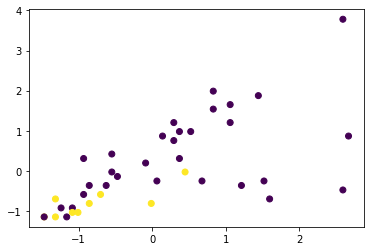

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,1],X_test[:,-2],c = y_test) #coloring based on actual values

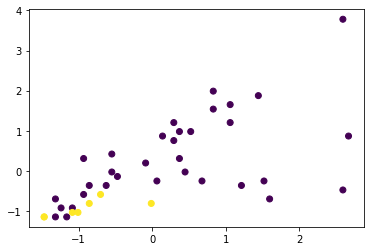

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,1],X_test[:,-2],c = yhat) #